## Modul 7

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Penjelasan Script di atas antara lain:

Pada baris pertama, import numpy as np digunakan untuk mengimpor pustaka NumPy. NumPy adalah pustaka yang digunakan untuk komputasi numerik dengan Python.

Pada baris kedua, import matplotlib.pyplot as plt digunakan untuk mengimpor pustaka Matplotlib. Matplotlib adalah pustaka yang digunakan untuk membuat visualisasi grafik dan plot.

Pada baris ketiga, import cv2 as cv digunakan untuk mengimpor pustaka OpenCV (Open Source Computer Vision Library). OpenCV adalah pustaka yang digunakan untuk memanipulasi gambar dan video. 

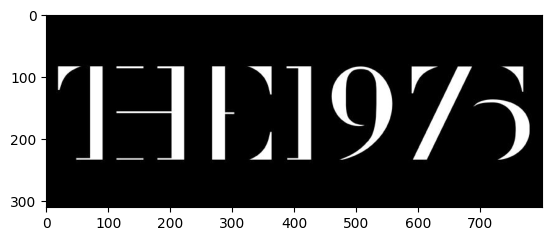

In [15]:
img = cv2.imread("1975.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Ubah ke skala abu-abu
plt.imshow(img_gray, cmap='gray')
plt.show()

Script di atas digunakan untuk membaca dan menampilkan gambar menggunakan pustaka Matplotlib dan OpenCV. Berikut adalah penjelasan langkah demi langkah:

img = plt.imread("Nama Gambar"): Baris ini membaca gambar dengan nama "Nama Gambar" menggunakan fungsi imread dari Matplotlib. Gambar tersebut kemudian disimpan dalam variabel pict.

img_gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY): Baris ini mengubah mode warna gambar dari RGB ke skala abu-abu (grayscale) menggunakan fungsi cvtColor dari OpenCV. Gambar skala abu-abu disimpan dalam variabel img_gray.

plt.imshow(img_gray, 'gray'): Baris ini menggunakan fungsi imshow dari Matplotlib untuk menampilkan gambar skala abu-abu. Parameter pertama adalah gambar yang ingin ditampilkan (img_gray), dan parameter kedua adalah mode tampilan gambar ('gray' untuk skala abu-abu).

plt.show(): Baris ini memanggil fungsi show dari Matplotlib untuk menampilkan gambar yang sudah ditampilkan menggunakan imshow.

In [16]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
kernel_ones = np.ones(kernel.shape, dtype=np.uint8)
print(kernel_ones)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


script cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)) digunakan untuk membuat matriks dengan bentuk elips 5x5 piksel menggunakan konstanta cv2.MORPH_ELLIPSE. Elemen struktur ini akan digunakan dalam operasi morfologi seperti erosi, dilasi, pembukaan, penutupan, dan sebagainya.

Selanjutnya, kernel_ones = np.ones(kernel.shape, dtype=np.uint8) digunakan untuk membuat matriks dengan bentuk yang sama seperti kernel, tetapi dengan semua elemen bernilai 1. Ini berguna jika Anda ingin memiliki elemen struktur yang memiliki semua piksel bernilai 1, yang sering digunakan dalam operasi morfologi tertentu.

Kemudian, kode tersebut mencetak matriks kernel_ones yang akan menampilkan tampilan matriks dengan semua elemen bernilai 1.

In [17]:
def padding(citdi, banyak_pad):
    citpad = np.pad(citdi, (banyak_pad, banyak_pad), mode='symmetric')
    return citpad

Fungsi ini memiliki dua parameter:
citdi: Citra input yang akan dipadding.
banyak_pad: Jumlah padding yang akan diterapkan pada setiap sisi citra.

citpad = np.pad(citdi, (banyak_pad, banyak_pad), mode='symmetric')   digunakan untuk melakukan padding pada citra citdi. Fungsi np.pad dari library NumPy digunakan untuk menambahkan nilai padding ke citra. Parameter pertama citdi adalah citra yang akan dipadding. Parameter kedua (banyak_pad, banyak_pad) adalah tuple yang menentukan jumlah padding yang akan ditambahkan pada setiap sisi citra. Parameter ketiga mode='symmetric' menunjukkan bahwa padding akan dilakukan secara simetris (menggunakan nilai piksel yang ada di sekitarnya untuk melakukan padding).

Hasil citra yang telah dipadding disimpan dalam variabel citpad.
Fungsi mengembalikan citra yang telah dipadding (citpad) sebagai hasil dari fungsi padding.

In [18]:
#erosi
def erosi(c):
    panjang, lebar = c.shape
    hasil = np.zeros(c.shape)
    for i in range(panjang - 2):
        for j in range(lebar - 2):
            if np.any(c[i:i+3, j:j+3] == 0):
                hasil[i:i+3, j:j+3] = 0
            else:
                hasil[i, j] = c[i, j]
    return hasil

1. Fungsi ini memiliki satu parameter yaitu c: Citra biner input yang akan mengalami operasi erosi.
2. panjang, lebar = c.shape digunakan untuk mendapatkan dimensi citra input. Variabel panjang akan menyimpan jumlah baris citra dan lebar akan menyimpan jumlah kolom citra.
3. hasil = np.zeros(c.shape) digunakan untuk membuat citra hasil dengan ukuran yang sama seperti citra input. Citra ini akan diisi dengan nilai 0.
4. Dua perulangan for digunakan untuk mengiterasi setiap piksel pada citra input, kecuali batas tepi yang berukuran 2 piksel pada setiap sisi. Iterasi dilakukan dengan mengambil blok 3x3 piksel pada setiap lokasi piksel dalam citra.
5. Pada setiap iterasi, np.any(c[i:i+3, j:j+3] == 0) digunakan untuk memeriksa apakah ada setidaknya satu piksel dengan nilai 0 dalam blok 3x3 piksel yang diambil. Jika ada, maka piksel pada posisi yang sama dalam citra hasil akan diatur menjadi 0 (erosi dilakukan).
6. Jika tidak ada piksel dengan nilai 0 dalam blok 3x3 piksel, maka piksel pada posisi yang sama dalam citra hasil akan tetap memiliki nilai yang sama dengan citra input
7. Setelah semua piksel telah diiterasi, citra hasil erosi disimpan dalam variabel hasil.
8. Fungsi mengembalikan citra hasil erosi (hasil) sebagai output dari fungsi erosi.

In [19]:
def dil(c):
    panjang, lebar = c.shape
    hasil = np.zeros(c.shape)
    for i in range(panjang - 2):
        for j in range(lebar - 2):
            if c[i, j] == 1:
                hasil[i:i+3, j:j+3] = 1
            elif hasil[i, j] != 0:
                hasil[i, j] = hasil[i, j]
            else:
                hasil[i, j] = c[i, j]
    return hasil

1. Fungsi ini memiliki satu parameter yaitu c: Citra biner input yang akan mengalami operasi erosi.
2. panjang, lebar = c.shape digunakan untuk mendapatkan dimensi citra input. 
3. hasil = np.zeros(c.shape) digunakan untuk membuat citra hasil dengan ukuran yang sama seperti citra input. Citra ini akan diisi dengan nilai 0.
4. Dua perulangan for digunakan untuk mengiterasi setiap piksel pada citra input, kecuali batas tepi yang berukuran 2 piksel pada setiap sisi. Iterasi dilakukan dengan mengambil blok 3x3 piksel pada setiap lokasi piksel dalam citra.
5. Pada setiap iterasi, c[i, j] == 1 digunakan untuk memeriksa apakah piksel pada posisi yang sama dalam citra input memiliki nilai 1. Jika iya, maka piksel dalam blok 3x3 piksel yang diambil dalam citra hasil akan diatur menjadi 1 (dilasi dilakukan).
6. Jika piksel pada posisi yang sama dalam citra hasil tidak sama dengan 0 (sudah diatur sebelumnya), maka nilai piksel tersebut akan tetap sama.
7. Jika piksel pada posisi yang sama dalam citra hasil masih bernilai 0 dan piksel pada posisi yang sama dalam citra input juga bernilai 0, maka nilai piksel tersebut akan tetap sama.
8. Setelah semua piksel telah diiterasi, citra hasil dilasi disimpan dalam variabel hasil.
9. Fungsi mengembalikan citra hasil dilasi (hasil) sebagai output dari fungsi dil.

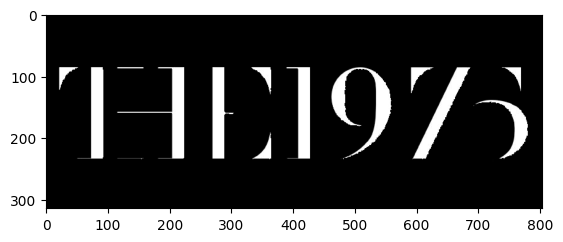

In [20]:
bwp1 = padding(img_gray, 2)
erosi1 = erosi(bwp1)
plt.imshow(erosi1, cmap='gray')
plt.show()

bwp1 = padding(img_gray, 2) digunakan untuk melakukan padding pada citra grayscale img_gray dengan jumlah padding sebesar 2 pada setiap sisi citra. Fungsi padding yang sebelumnya didefinisikan digunakan untuk melakukan padding. Hasil padding disimpan dalam variabel bwp1.

erosi1 = erosi(bwp1) digunakan untuk melakukan erosi pada citra yang sudah dipadding (bwp1). Fungsi erosi yang sebelumnya didefinisikan digunakan untuk melakukan erosi. Hasil erosi disimpan dalam variabel erosi1.

plt.imshow(erosi1, cmap='gray') digunakan untuk menampilkan citra hasil erosi (erosi1). Fungsi imshow dari library Matplotlib digunakan untuk menampilkan citra. Parameter erosi1 adalah citra yang akan ditampilkan, dan cmap='gray' digunakan untuk menampilkan citra dengan skala abu-abu.

plt.show() digunakan untuk menampilkan gambar citra erosi yang sudah diolah.

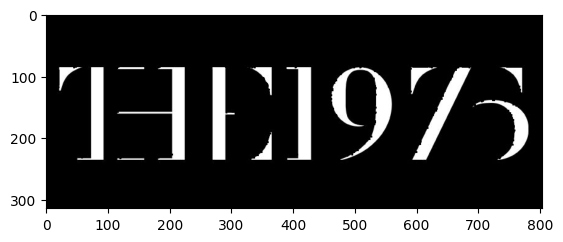

In [21]:
bwp1 = padding(img_gray, 2)
dilasi1 = dil(bwp1)
plt.imshow(dilasi1, cmap='gray')
plt.show()

bwp1 = padding(img_gray, 2) digunakan untuk melakukan padding pada citra grayscale img_gray dengan jumlah padding sebesar 2 pada setiap sisi citra. Fungsi padding yang sebelumnya didefinisikan digunakan untuk melakukan padding. Hasil padding disimpan dalam variabel bwp1.

dilasi1 = dil(bwp1) digunakan untuk melakukan dilasi pada citra yang sudah dipadding (bwp1). Fungsi dilasi yang sebelumnya didefinisikan digunakan untuk melakukan dilasi. Hasil dilasi disimpan dalam variabel dilasi1.

plt.imshow(dilasi1, cmap='gray') digunakan untuk menampilkan citra hasil dilasi (dilasi1). Fungsi imshow dari library Matplotlib digunakan untuk menampilkan citra. Parameter dilasi1 adalah citra yang akan ditampilkan, dan cmap='gray' digunakan untuk menampilkan citra dengan skala abu-abu.

plt.show() digunakan untuk menampilkan gambar citra erosi yang sudah diolah.

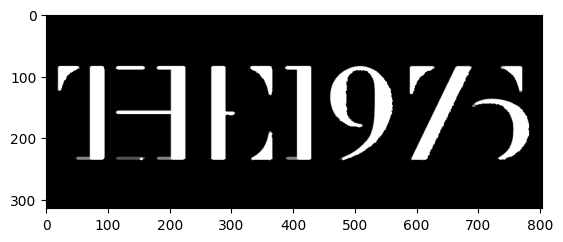

In [22]:
plt.imshow (cv2.dilate(erosi1, kernel, iterations = 1), cmap = "gray")

cv2.dilate(erosi1, kernel, iterations=1) digunakan untuk melakukan operasi dilasi pada citra erosi1 menggunakan kernel kernel. Fungsi dilate dari library OpenCV (cv2) digunakan untuk melakukan dilasi. Parameter pertama erosi1 adalah citra yang akan diolah, parameter kedua kernel adalah elemen struktur yang digunakan untuk operasi dilasi, dan parameter iterations=1 menunjukkan jumlah iterasi dilasi yang akan dilakukan. plt.imshow() berfungsi untuk menampilkan hasil dilate.

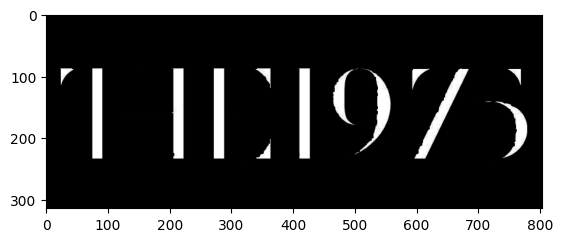

In [23]:
plt.imshow(cv2.erode(dilasi1, kernel, iterations = 1), cmap = "gray")

cv2.erode(dilasi, kernel, iterations=1) digunakan untuk melakukan operasi dilasi pada citra dilasi menggunakan kernel kernel. Fungsi erode dari library OpenCV (cv2) digunakan untuk melakukan dilasi. Parameter pertama dilasi adalah citra yang akan diolah, parameter kedua kernel adalah elemen struktur yang digunakan untuk operasi dilasi, dan parameter iterations=1 menunjukkan jumlah iterasi dilasi yang akan dilakukan. plt.imshow() berfungsi untuk menampilkan hasil erode.